In [2]:
import pandas as pd
import nltk #procesamiento de palabras
from nltk.corpus import stopwords
import gensim #pip install gensim sirve separa texto 
import re #sirve para concatenar texto


from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator #crear los stopwords
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [5]:
filename ='C:/Users/F32740/OneDrive - Kimberly-Clark/Documents/U/Análisis de datos/Tarea Scrappy/Vacunas_tarea.xlsx'
#filename = '/Users/cmoralesal/Documents/Carlos Morales/BAC-comentarios/clasificacion_1.xlsx'
df = pd.read_excel(filename)
df.head(5)

,status_id,screen_name,text
0,8.320000e+17,COVID_19,Cada día más requisitos! Y la gente aplaudiend...
1,8.330000e+17,COVID_19,Estupideces estupideces y más estupideces!!!
2,8.340000e+17,COVID_19,Y luego van a seguir con la tercera cuarta qui...
3,8.340000e+17,COVID_19,Hp más necios
4,8.340000e+17,COVID_19,Sigan borregos creyéndose todo los que les dic...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   status_id    142 non-null    float64
 1   screen_name  142 non-null    object 
 2   text         142 non-null    object 
dtypes: float64(1), object(2)
memory usage: 3.5+ KB


In [8]:
black_list = ['más', 'mas', 'unir', 'paises', 'pais', 'espa', 'no', 'os', 'a', 'compa','si'] #agregar palabras a la lista negra
def cleaner(word): #limpia todas las las palabras no alfanumericas, convierte en miniscula, quita puntuación, etc
  word = re.sub(r'((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*', '', word, flags=re.MULTILINE)
  word = re.sub(r'(?::|;|=)(?:-)?(?:\)|\(|D|P)', "", word)
  word = re.sub(r'CR', 'cr', word)
  word = re.sub(r'\#\.', '', word)
  word = re.sub(r'\n', '', word)
  word = re.sub(r',', '', word)
  word = re.sub(r'\-', ' ', word)
  word = re.sub(r'\.{3}', ' ', word)
  word = re.sub(r'a{2,}', 'a', word)
  word = re.sub(r'é{2,}', 'é', word)
  word = re.sub(r'i{2,}', 'i', word)
  word = re.sub(r'ja{2,}', 'ja', word) 
  word = re.sub(r'á', 'a', word)
  word = re.sub(r'é', 'e', word)
  word = re.sub(r'í', 'i', word)
  word = re.sub(r'ó', 'o', word)
  word = re.sub(r'ú', 'u', word)  
  word = re.sub('[^a-zA-Z]', ' ', word)
  list_word_clean = []
  for w1 in word.split(" "): #coloca en minuscula las palabras
    if  w1.lower() not in stopwords:
      list_word_clean.append(w1.lower())

    
  bigram_list = bigram[list_word_clean]
  out_text = " ".join(bigram_list) #unifica todas las palabras por bigramas
  return out_text

In [9]:
len(df.text.to_list())

142

In [12]:
%%time
bigram = gensim.models.Phrases(df.text.to_list()) #separa las palabras eb comas

Wall time: 9.97 ms


In [13]:
bigram[df.text.to_list()[500].split()]

IndexError: list index out of range

In [14]:
stop = set(stopwords.words('spanish')) #quita palabras comunes del español
adicional_palabras=set(black_list) #aplica el stopword
stopwords = stop.union(adicional_palabras) #une el stop de palabras mas la black lista

In [15]:
%%time
df['text'] = df['text'].apply(cleaner)

Wall time: 11.5 ms


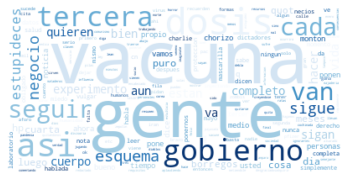

In [16]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from subprocess import check_output



text = df[df.screen_name=='lopezobrador_'].screen_name.tolist() #filtrar candidato
text2 = ' '.join(df['text']) #texto chorreado

wordcloud = WordCloud(stopwords = stopwords,
                      collocations=True,
                      colormap='Blues',
                      background_color="white").generate(str(text2))

#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()
#fig.savefig("nube_palabras.png", dpi=900)

In [17]:
### creando el diccionario de las palabras 
texto_diccionario = wordcloud.process_text(text2) #procesar el texto a diccionario ('josefina': 5, 'vazquez': 1, 'debe': 13)
# ordenar el diccionario
frecuencia={k: v for k, v in sorted(texto_diccionario.items(),reverse=True, key=lambda item: item[1])} #ordena el diccionario

print(list(frecuencia.items())[:10])


[('vacuna', 16), ('gente', 13), ('dosis', 12), ('asi', 10), ('gobierno', 10), ('tercera', 9), ('cada', 7), ('van', 7), ('seguir', 7), ('esquema', 7)]


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

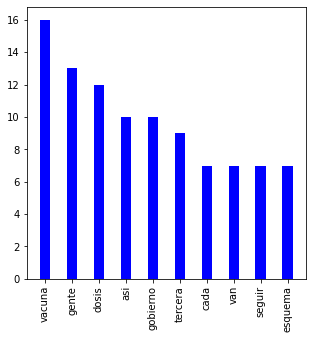

In [18]:
palabras = list(frecuencia.keys())[:10] #obtengo las palbras
cantidad = list(frecuencia.values())[:10] #obtengo los valores

fig = plt.figure(figsize = (5, 5)) 
  
# creando el mapa
plt.bar(palabras, cantidad, color ='blue',  
        width = 0.4)
plt.xticks(rotation=90)

In [19]:
#pip install keras tensorflow
#pip install sentiment-analysis-spanish

from sentiment_analysis_spanish import sentiment_analysis

ModuleNotFoundError: No module named 'sentiment_analysis_spanish'

In [ ]:
sentiment = sentiment_analysis.SentimentAnalysisSpanish()
print(sentiment.sentiment("cual es el horario?"))


In [ ]:
print(sentiment.sentiment("me parece terrible esto que me estás diciendo"))

In [ ]:
nltk.download('stopwords')